# Diagnose a data file

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">Diagnose a data file</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2019-01-05</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2018-12-21</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">N/A</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">N/A</td>
    </tr>
</table>

# Ideas

- Open a file.
- Determine column types.
- Determine number of unique entries.
- Create filter.
- Open file with filter.
- Determine data range.
- Scatter plot of data range.
- Create munging filter.

In [1]:
import pandas as pd

In [2]:
# Read the csv file.
df = pd.read_csv('thirteen_weeks.csv',
                 parse_dates=True,
                 index_col='Time')

In [3]:
df.shape

(4275, 29)

In [4]:
# Delete weekend data.
df = df[df.index.dayofweek < 5]

In [5]:
df.shape

(3120, 29)

In [6]:
df.dtypes

Water Load (lb/MSF)            float64
Trim Board Density (lb/cft)     object
Trim Board Thickness (in)       object
Trim Board Weight (lb/sft)      object
Wool Target (%)                 object
Wool Usage (%)                 float64
Wool Flow (lb/min)             float64
Starch Target (%)               object
Starch Usage (%)               float64
Starch Flow (lb/min)           float64
Clay Target (%)                 object
Clay Usage (%)                   int64
Clay Flow (lb/min)             float64
Newsprint Target (%)            object
Newsprint Usage (%)            float64
Perlite Target (%)              object
Perlite Usage (%)              float64
Wet Clay Target (%)             object
Wet Clay Usage (%)               int64
Wet Gypsum Target (%)           object
Wet Gypsum Usage (%)             int64
Wet Broke Target (%)            object
Wet Broke Usage (%)            float64
Dust Target (%)                 object
Dust Usage (%)                 float64
Broke Target (%)         

In [7]:
for column_name in df.columns:
    print(column_name, 'has', df[column_name].nunique(), 'unique values.')

Water Load (lb/MSF) has 127 unique values.
Trim Board Density (lb/cft) has 590 unique values.
Trim Board Thickness (in) has 42 unique values.
Trim Board Weight (lb/sft) has 100 unique values.
Wool Target (%) has 4 unique values.
Wool Usage (%) has 2829 unique values.
Wool Flow (lb/min) has 2829 unique values.
Starch Target (%) has 2 unique values.
Starch Usage (%) has 2828 unique values.
Starch Flow (lb/min) has 3120 unique values.
Clay Target (%) has 2 unique values.
Clay Usage (%) has 1 unique values.
Clay Flow (lb/min) has 3119 unique values.
Newsprint Target (%) has 2 unique values.
Newsprint Usage (%) has 2826 unique values.
Perlite Target (%) has 4 unique values.
Perlite Usage (%) has 2829 unique values.
Wet Clay Target (%) has 2 unique values.
Wet Clay Usage (%) has 1 unique values.
Wet Gypsum Target (%) has 2 unique values.
Wet Gypsum Usage (%) has 1 unique values.
Wet Broke Target (%) has 6 unique values.
Wet Broke Usage (%) has 2811 unique values.
Dust Target (%) has 7 unique

In [8]:
for column_name in df.columns:
    print(column_name, 'has', df[column_name].unique(), 'unique values.')

Water Load (lb/MSF) has [1036.680054  1031.790039  1026.900024  1012.230042  1007.340088
 1012.229919  1041.569946  1041.570068  1026.899902  1046.460083
 1022.009827  1017.120117  1022.009949  1070.909912  1007.339966
  982.8900146  992.6699829  997.5599976 1017.119995  1002.450012
 1061.129883  1105.140015  1095.359985  1070.910156  1070.910034
 1056.23999   1022.010071   987.7799683 1486.560059  1457.220093
 1383.869995  1300.73999   1290.959961  1305.630127  1100.250122
  997.5598755 1158.930054  1066.02002   1036.679932   982.8899536
  987.7800293 1413.210083  1393.649902  1398.540039  1437.660034
 1447.440063  1427.880005  1295.850098  1119.810059  1110.029907
 1154.040039  1085.580078  1075.800049  1085.579956  1095.359863
 1061.130005  1056.240112  1075.799927  1110.030029  1100.249878
 1080.689941  1051.350098  1080.690063  1046.459961  1432.77002
 1354.530151  1031.789917  1051.349976   992.6700439 1031.790161
 1080.690186  1281.180054  1090.469971  1051.349854  1090.470093
 

In [9]:
NA_VALUES = ['Bad Input',
             'Invalid Data',
             'No Data',
             'Calc Failed',
             'Pt Created']

In [10]:
df = pd.read_csv('thirteen_weeks.csv',
                 parse_dates=True,
                 index_col='Time',
                 na_values=NA_VALUES)

In [11]:
df.shape

(4275, 29)

In [12]:
df.dtypes

Water Load (lb/MSF)            float64
Trim Board Density (lb/cft)    float64
Trim Board Thickness (in)      float64
Trim Board Weight (lb/sft)     float64
Wool Target (%)                float64
Wool Usage (%)                 float64
Wool Flow (lb/min)             float64
Starch Target (%)              float64
Starch Usage (%)               float64
Starch Flow (lb/min)           float64
Clay Target (%)                float64
Clay Usage (%)                   int64
Clay Flow (lb/min)             float64
Newsprint Target (%)           float64
Newsprint Usage (%)            float64
Perlite Target (%)             float64
Perlite Usage (%)              float64
Wet Clay Target (%)            float64
Wet Clay Usage (%)               int64
Wet Gypsum Target (%)          float64
Wet Gypsum Usage (%)             int64
Wet Broke Target (%)           float64
Wet Broke Usage (%)            float64
Dust Target (%)                float64
Dust Usage (%)                 float64
Broke Target (%)         

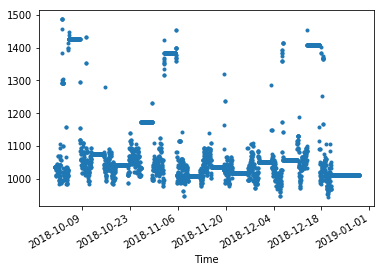

In [14]:
# Create a scatter plot of one column versus the index 'Time'.
import matplotlib.pyplot as plt
ax = df.plot.line(y='Water Load (lb/MSF)',
                  legend=False,
                  style='.')